In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from finquant.portfolio import build_portfolio

In [3]:
df = pd.read_excel('screener_comb.xlsx',index_col='Date',parse_dates=True).fillna(method='ffill')
df.head()

,ARTIIND,ABBOTTINDIA,AEGISCHEM,AJANTPHARM,ASIANPAINTS,ASTRAL,ATUL,AUROPHARMA,BALKRISIND,BATAINDIA,BBTC,BERGEPAINT,BRITANNIA,DABUR,DIVISLAB,EICHERMOT,GODREJCP,GRAULES,HATSUN,HCLTECH,HEXAWARE,HONAUT,IGL,IPCALAB,KRBL,MARICO,MARUTI,MINDTREE,NATCOPHARM,NIITTECH,PAGEIND,PDLITIND,RELAXO,SOLARINDS,SUPREMEIND,TCS,TIMKEN,TITAN,TORNTPHARM,TTKPRESTIG,TVSMOTOR,VINATIORGA,WABCOINDIA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-10,210.201355,4706.607422,79.685043,1602.936401,868.882324,334.035950,1373.700317,762.747986,325.763885,569.956909,581.143311,152.833954,1525.859741,291.463745,939.414612,19648.990234,436.573700,110.981316,280.603271,408.414856,245.058792,8971.309570,84.037384,752.009399,180.342911,202.320999,4259.235352,572.662415,474.307495,442.680176,14095.514648,570.429016,279.382385,685.360596,605.083252,1121.619385,589.454285,318.864990,1397.546021,3164.101318,226.001053,240.412613,6573.969727
2015-08-11,207.386124,4445.460938,82.049278,1589.366089,872.266296,326.907715,1372.919189,746.043030,324.396942,566.598206,590.531799,157.417236,1578.915039,287.927734,983.473511,19454.666016,434.614227,103.142845,280.298828,407.153992,246.946182,8979.762695,86.601456,752.306335,179.300446,201.399048,4266.006348,597.249207,470.887054,448.646790,14176.094727,575.576233,278.098022,702.012146,607.320129,1130.426880,579.666260,317.945221,1399.044800,3128.819336,215.664627,236.448074,6558.983887
2015-08-12,198.354034,4392.703125,79.850105,1652.098633,854.137390,326.429810,1330.155762,729.092896,319.188354,551.916321,578.709229,158.726624,1604.089355,282.788666,1020.919495,19151.703125,421.551086,99.510376,274.008331,408.871399,245.014908,8944.852539,83.697754,761.314209,176.220520,201.306839,4266.006348,608.142456,460.225616,479.543274,14222.073242,566.291992,269.527069,678.022644,603.498779,1144.534668,566.852051,319.591034,1399.044800,3128.819336,215.809525,233.718018,6313.210449
2015-08-13,198.659027,4438.070801,78.631577,1610.711548,842.486511,329.177582,1289.589111,721.401733,312.211975,552.492188,559.187073,154.557281,1582.154785,281.374237,1039.275269,19203.322266,402.532013,102.569321,274.853455,422.088837,242.030090,8694.852539,81.447823,763.393005,173.803940,195.175919,4255.163086,617.006836,434.443665,491.753784,14222.073242,552.533997,263.796661,652.363281,595.436584,1174.200684,546.283081,317.703186,1420.401367,2997.820068,217.886475,217.954788,6331.073730
2015-08-14,201.943405,4704.454102,80.675400,1626.648315,845.387146,332.124481,1282.608398,746.728821,314.851685,558.033813,571.655457,153.626114,1619.316162,275.339386,1040.495850,19876.697266,401.552307,107.301056,278.506744,419.806244,243.666046,8745.580078,82.084595,808.283875,167.833572,193.401184,4330.599121,607.591187,441.789459,460.117279,13545.435547,549.118652,270.490387,642.428101,598.232788,1158.334961,545.195557,324.383484,1466.673950,3021.959717,222.378448,218.928162,6471.848633


In [4]:
df.shape

(1229, 43)

In [5]:
stocks5_ret = df.pct_change().dropna(how = 'any')
stocks5_ret.head()

,ARTIIND,ABBOTTINDIA,AEGISCHEM,AJANTPHARM,ASIANPAINTS,ASTRAL,ATUL,AUROPHARMA,BALKRISIND,BATAINDIA,BBTC,BERGEPAINT,BRITANNIA,DABUR,DIVISLAB,EICHERMOT,GODREJCP,GRAULES,HATSUN,HCLTECH,HEXAWARE,HONAUT,IGL,IPCALAB,KRBL,MARICO,MARUTI,MINDTREE,NATCOPHARM,NIITTECH,PAGEIND,PDLITIND,RELAXO,SOLARINDS,SUPREMEIND,TCS,TIMKEN,TITAN,TORNTPHARM,TTKPRESTIG,TVSMOTOR,VINATIORGA,WABCOINDIA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-11,-0.013393,-0.055485,0.029670,-0.008466,0.003895,-0.021340,-0.000569,-0.021901,-0.004196,-0.005893,0.016155,0.029989,0.034771,-0.012132,0.046900,-0.009890,-0.004488,-0.070629,-0.001085,-0.003087,0.007702,0.000942,0.030511,0.000395,-0.005780,-0.004557,0.001590,0.042934,-0.007211,0.013478,0.005717,0.009023,-0.004597,0.024296,0.003697,0.007852,-0.016605,-0.002885,0.001072,-0.011151,-0.045736,-0.016491,-0.002280
2015-08-12,-0.043552,-0.011868,-0.026803,0.039470,-0.020784,-0.001462,-0.031148,-0.022720,-0.016056,-0.025912,-0.020020,0.008318,0.015944,-0.017848,0.038075,-0.015573,-0.030057,-0.035218,-0.022442,0.004218,-0.007821,-0.003888,-0.033529,0.011974,-0.017177,-0.000458,0.000000,0.018239,-0.022641,0.068866,0.003243,-0.016130,-0.030820,-0.034172,-0.006292,0.012480,-0.022106,0.005176,0.000000,0.000000,0.000672,-0.011546,-0.037471
2015-08-13,0.001538,0.010328,-0.015260,-0.025051,-0.013641,0.008418,-0.030498,-0.010549,-0.021857,0.001043,-0.033734,-0.026267,-0.013674,-0.005002,0.017980,0.002695,-0.045117,0.030740,0.003084,0.032327,-0.012182,-0.027949,-0.026882,0.002731,-0.013713,-0.030456,-0.002542,0.014576,-0.056020,0.025463,0.000000,-0.024295,-0.021261,-0.037844,-0.013359,0.025920,-0.036286,-0.005907,0.015265,-0.041869,0.009624,-0.067446,0.002830
2015-08-14,0.016533,0.060022,0.025992,0.009894,0.003443,0.008952,-0.005413,0.035108,0.008455,0.010030,0.022297,-0.006025,0.023488,-0.021448,0.001174,0.035066,-0.002434,0.046132,0.013292,-0.005408,0.006759,0.005834,0.007818,0.058804,-0.034351,-0.009093,0.017728,-0.015260,0.016909,-0.064334,-0.047577,-0.006181,0.025375,-0.015230,0.004696,-0.013512,-0.001991,0.021027,0.032577,0.008052,0.020616,0.004466,0.022236
2015-08-17,0.006041,0.000093,-0.011313,-0.017694,0.023903,0.007194,0.002474,0.027881,-0.015795,0.011091,-0.001043,0.031630,-0.016211,0.009247,0.000266,0.003117,0.004996,0.026281,-0.002673,0.008441,0.024315,0.000631,0.018204,0.010042,-0.016093,-0.004171,-0.004965,-0.004972,-0.033514,0.019803,0.034348,0.017346,0.009040,0.018108,0.005998,0.025649,0.003122,0.004626,0.021299,0.045225,0.000217,0.014964,0.033997


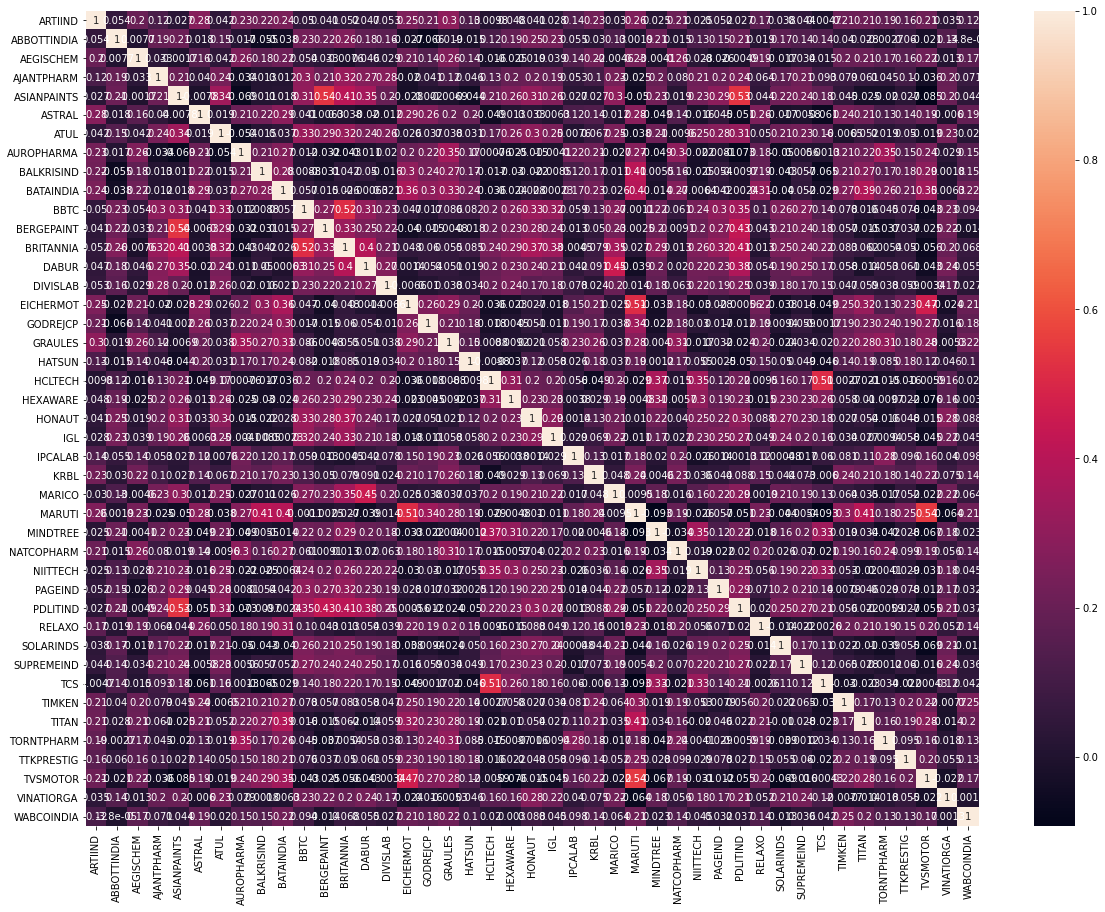

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(stocks5_ret.corr(),annot=True)

In [7]:
returns = stocks5_ret.mean() * 245
variance = stocks5_ret.std() * np.sqrt(245)
returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single stocks5_ret-frame
ret_var = pd.concat([returns, variance], axis = 1)
ret_var.columns = ["Returns","Variance"]
ret_var

,Returns,Variance
ARTIIND,0.377469,0.326178
ABBOTTINDIA,0.282535,0.271400
AEGISCHEM,0.290805,0.446930
AJANTPHARM,0.062046,0.326114
ASIANPAINTS,0.168993,0.252030
ASTRAL,0.284187,0.334241
ATUL,0.310389,0.306083
AUROPHARMA,0.118169,0.409299
BALKRISIND,0.347547,0.358866
BATAINDIA,0.202560,0.298495


# Clustering

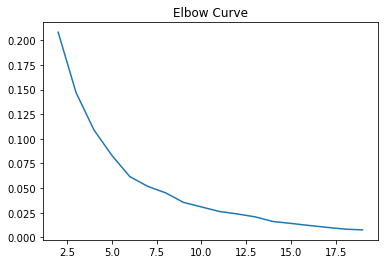

In [8]:
from sklearn.cluster import KMeans
X =  ret_var.values #Converting ret_var into nummpy array
sse = []
for k in range(2,20):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,20), sse)
plt.title("Elbow Curve")
plt.show()

In [9]:
# Silhoutte
from sklearn.metrics import silhouette_score

sil=[]
cl=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for k in cl:
    mod=KMeans(k)
    mod.fit(ret_var)
    score=silhouette_score(ret_var,mod.labels_)
    print(score)
    sil.append(score)

0.4706649642642172
0.47041476344767813
0.38470587736286493
0.4090896221374062
0.4169954452514798
0.3815340984040056
0.39647369172790975
0.39343851174434197
0.39508047190816326
0.4138239364929325
0.3966499391668438
0.3932544556864228
0.40589386342302375
0.3802588675285443
0.40445353623003794
0.4285718467298587
0.4416083114261247
0.4229323482673596
0.3977425806312159


In [10]:
clus = int(input('Enter no of clusters to be formed'))

Enter no of clusters to be formed6


In [11]:
clust_mod=KMeans(n_clusters=clus)
clust_mod.fit(ret_var)
label=clust_mod.labels_
ret_var['label']= label
ret_var.sort_values(by = 'label')

,Returns,Variance,label
WABCOINDIA,0.049027,0.271794,0
SOLARINDS,0.095303,0.246717,0
AJANTPHARM,0.062046,0.326114,0
EICHERMOT,0.078494,0.339765,0
TITAN,0.301122,0.335278,1
IPCALAB,0.247497,0.338580,1
HATSUN,0.240916,0.323111,1
DIVISLAB,0.275469,0.348934,1
BERGEPAINT,0.297401,0.315783,1
HONAUT,0.265987,0.297030,1


In [12]:
b = ret_var.groupby('label')['Returns'].max()
b = list(b)
b

[0.09530348991453055,
 0.310388689800141,
 0.22088577078179664,
 0.19876627427860752,
 0.39649953316323727,
 0.3067095573391113]

In [13]:
c = ret_var.groupby('label')['Variance'].min()
c = list(c)
c

[0.24671743637086846,
 0.27139980588948914,
 0.24830881480424483,
 0.30907190886158536,
 0.3079632721163534,
 0.4439458927033834]

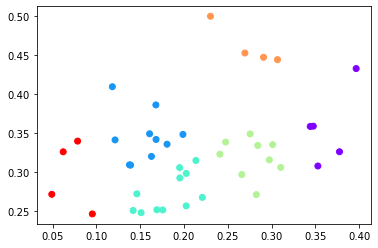

In [14]:
kmeans = KMeans(n_clusters = clus).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [15]:
high_ret = pd.DataFrame()
for i in b:
    high_ret = high_ret.append(ret_var[ret_var['Returns'] == i])
high_ret

,Returns,Variance,label
SOLARINDS,0.095303,0.246717,0
ATUL,0.310389,0.306083,1
BRITANNIA,0.220886,0.267856,2
MINDTREE,0.198766,0.348317,3
NIITTECH,0.396500,0.432510,4
GRAULES,0.306710,0.443946,5


In [16]:
low_var = pd.DataFrame()
for i in c:
    low_var = low_var.append(ret_var[ret_var['Variance'] == i])
low_var

,Returns,Variance,label
SOLARINDS,0.095303,0.246717,0
ABBOTTINDIA,0.282535,0.271400,1
MARICO,0.150963,0.248309,2
GODREJCP,0.138957,0.309072,3
IGL,0.352785,0.307963,4
GRAULES,0.306710,0.443946,5


In [17]:
high_ret.drop('label',axis=1,inplace=True)
low_var.drop('label',axis=1,inplace=True)

In [18]:
high_ret_col = list(high_ret.index)
low_var_col = list(low_var.index)

high_ret_data = stocks5_ret[high_ret_col]
low_var_data = stocks5_ret[low_var_col]

# Correlation between the high returns data

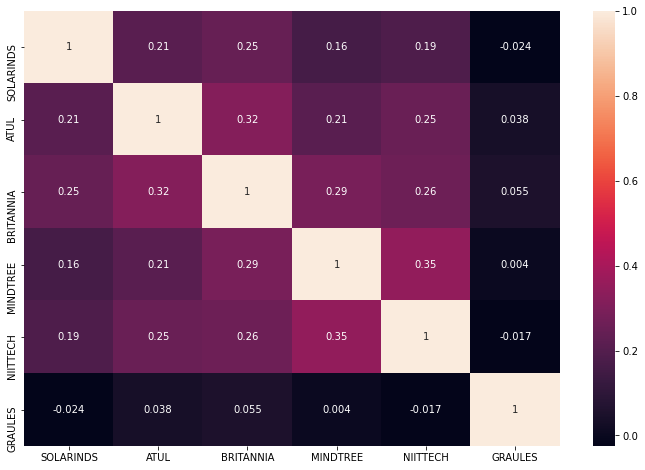

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(high_ret_data.corr(),annot=True)

# Correlation between low variance data

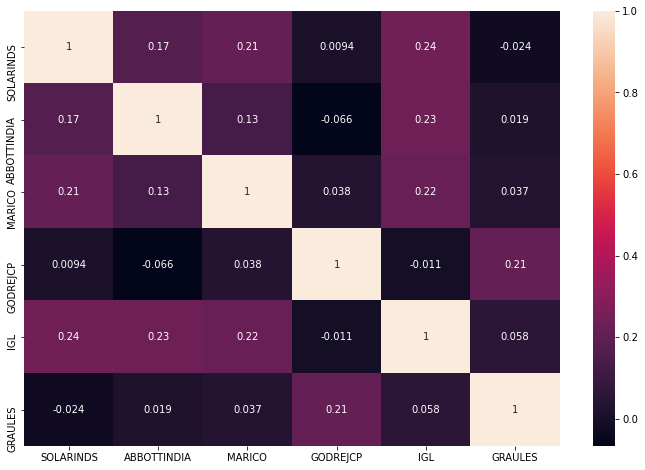

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(low_var_data.corr(),annot=True)

# Portfolio Optimization for high Return Data

In [21]:
# no of days considered here in a year
q1_ret = high_ret_data.mean() * 245
q1_cov = high_ret_data.cov() * 245

In [22]:
pf_ret , pf_vol , pf_sharpe_ratio , pf_coin_weight = ([] for i in range(4))
num_portfolios = 50000
for portfolio in range (num_portfolios):
    weights = np.random.random(6)
    weights = weights/np.sum(weights)
    returns = np.dot(weights,q1_ret)
    volatility = np.sqrt(np.dot(weights.T , np.dot(q1_cov , weights)))
    sharpe = returns/volatility
    pf_coin_weight.append(weights)
    pf_ret.append(returns)
    pf_vol.append(volatility)
    pf_sharpe_ratio.append(sharpe)

In [25]:
print('Max sharpe ratio: ', max(pf_sharpe_ratio))
print('Its location in the array: ', pf_sharpe_ratio.index(max(pf_sharpe_ratio)))
sharp_max = pf_sharpe_ratio.index(max(pf_sharpe_ratio))

Max sharpe ratio:  1.4438329124335916
Its location in the array:  39291


So the best portfolio is on index 39291. Let’s check the allocation weights in that index number and save the return and volatility figures to use it in the chart later

In [26]:
pf_coin_weight = pd.DataFrame(pf_coin_weight)

#get all the weights given to the stocks
print(pf_coin_weight.iloc[sharp_max,:])

max_sr_ret = pf_ret[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]
max_sr_vol = pf_vol[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]

0    0.038894
1    0.328059
2    0.198694
3    0.048338
4    0.187555
5    0.198460
Name: 39291, dtype: float64


In [27]:
print('Max returns for this portfolio: ', max_sr_ret)
print('Max volatility for this portfolio: ', max_sr_vol)

Max returns for this portfolio:  0.29426430711874685
Max volatility for this portfolio:  0.20380772912480716


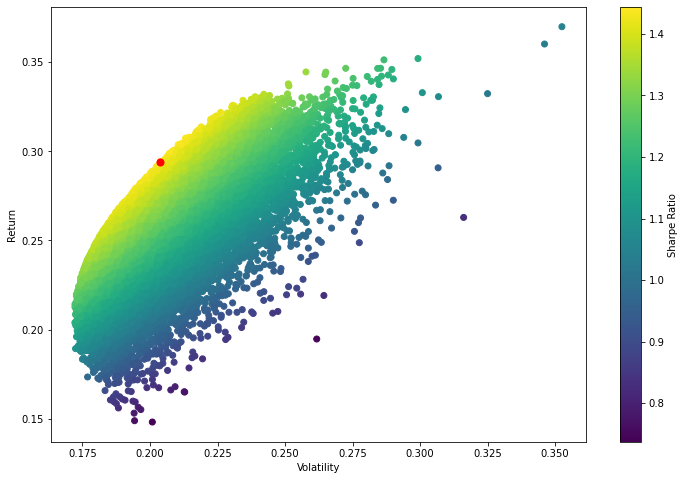

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.scatter(pf_vol, pf_ret, c=pf_sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50)

plt.show()

In [29]:
high_ret_random = pd.DataFrame()
high_ret_random['Returns'] = pf_ret
high_ret_random['Volatility'] = pf_vol
high_ret_random['Sharp_ratio'] = pf_sharpe_ratio
high_ret_random.head()

,Returns,Volatility,Sharp_ratio
0,0.272306,0.212039,1.284227
1,0.287646,0.208112,1.382170
2,0.282129,0.216997,1.300151
3,0.307800,0.293940,1.047153
4,0.264624,0.197982,1.336612


In [30]:
ret = float(input('Enter minimum returns you want '))
vol = float(input('Enter maximum volatility you want '))
high_ret_random[(high_ret_random['Returns'] > ret) & (high_ret_random['Volatility'] < vol)]

Enter minimum returns you want 0.25
Enter maximum volatility you want 0.19


,Returns,Volatility,Sharp_ratio
31,0.250492,0.182074,1.375766
60,0.250329,0.188464,1.328255
94,0.256077,0.185284,1.382077
109,0.264497,0.189178,1.398133
135,0.251497,0.185166,1.358231
...,...,...,...
49862,0.264539,0.188786,1.401263
49899,0.250621,0.189382,1.323367
49972,0.252588,0.188342,1.341117
49974,0.261472,0.188778,1.385078


# Input index of desired parameters

In [31]:
ind = int(input('Enter the index of parameters you want '))
print('The weightage for corresponding parameters are ')
print(high_ret_col)
print(pf_coin_weight.iloc[ind,:])

Enter the index of parameters you want 135
The weightage for corresponding parameters are 
['SOLARINDS', 'ATUL', 'BRITANNIA', 'MINDTREE', 'NIITTECH', 'GRAULES']
0    0.198618
1    0.230860
2    0.231874
3    0.077450
4    0.158016
5    0.103181
Name: 135, dtype: float64


# Portfolio Optimization for Low variance Data

In [32]:
# no of days considered here in a year
q1_ret = low_var_data.mean() * 245
q1_cov = low_var_data.cov() * 245

In [33]:
pf_ret , pf_vol , pf_sharpe_ratio , pf_coin_weight = ([] for i in range(4))
num_portfolios = 50000
for portfolio in range (num_portfolios):
    weights = np.random.random(6)
    weights = weights/np.sum(weights)
    returns = np.dot(weights,q1_ret)
    volatility = np.sqrt(np.dot(weights.T , np.dot(q1_cov , weights)))
    sharpe = returns/volatility
    pf_coin_weight.append(weights)
    pf_ret.append(returns)
    pf_vol.append(volatility)
    pf_sharpe_ratio.append(sharpe)

In [34]:
print('Max sharpe ratio: ', max(pf_sharpe_ratio))
print('Its location in the array: ', pf_sharpe_ratio.index(max(pf_sharpe_ratio)))
max_sharp =  pf_sharpe_ratio.index(max(pf_sharpe_ratio))

Max sharpe ratio:  1.5954920681845823
Its location in the array:  21892


So the best portfolio is on index 21892. Let’s check the allocation weights in that index number and save the return and volatility figures to use it in the chart later

In [35]:
pf_coin_weight = pd.DataFrame(pf_coin_weight)

#get all the weights given to the stocks
print(pf_coin_weight.iloc[max_sharp,:])

max_sr_ret = pf_ret[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]
max_sr_vol = pf_vol[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]

0    0.008628
1    0.341949
2    0.104687
3    0.151107
4    0.265929
5    0.127699
Name: 21892, dtype: float64


In [36]:
print('Max returns for this portfolio: ', max_sr_ret)
print('Max volatility for this portfolio: ', max_sr_vol)

Max returns for this portfolio:  0.26721858424425754
Max volatility for this portfolio:  0.16748349275613136


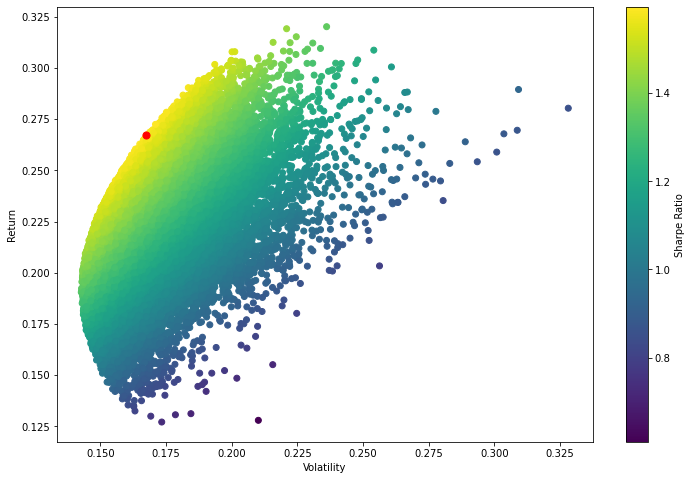

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.scatter(pf_vol, pf_ret, c=pf_sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50)

plt.show()

In [38]:
low_ret_random = pd.DataFrame()
low_ret_random['Returns'] = pf_ret
low_ret_random['Volatility'] = pf_vol
low_ret_random['Sharp_ratio'] = pf_sharpe_ratio
low_ret_random.head()

,Returns,Volatility,Sharp_ratio
0,0.221030,0.188482,1.172684
1,0.197410,0.159148,1.240423
2,0.225470,0.167987,1.342183
3,0.193178,0.165710,1.165764
4,0.217213,0.156315,1.389584


In [39]:
ret = float(input('Enter minimum returns you want '))
vol = float(input('Enter maximum volatility you want '))
low_ret_random[(low_ret_random['Returns'] > ret) & (low_ret_random['Volatility'] < vol)]

Enter minimum returns you want 0.24
Enter maximum volatility you want 0.17


,Returns,Volatility,Sharp_ratio
39,0.247606,0.164593,1.504353
64,0.246482,0.168149,1.465857
78,0.249999,0.165071,1.514497
83,0.250564,0.163795,1.529743
138,0.249190,0.169156,1.473137
...,...,...,...
49902,0.241799,0.157286,1.537315
49905,0.253876,0.167941,1.511698
49952,0.249186,0.167144,1.490850
49958,0.244908,0.168012,1.457680


# Input index of desired parameters

In [41]:
ind = int(input('Enter the index of parameters you want '))
print('The weightage for corresponding parameters are ')
print(low_var_col)
print(pf_coin_weight.iloc[ind,:])

Enter the index of parameters you want 138
The weightage for corresponding parameters are 
['SOLARINDS', 'ABBOTTINDIA', 'MARICO', 'GODREJCP', 'IGL', 'GRAULES']
0    0.099785
1    0.216425
2    0.097646
3    0.149907
4    0.198857
5    0.237379
Name: 138, dtype: float64
